# Brain Tumor Detection with YOLOv11: A Hands-on Tutorial

## Learning Objectives
By the end of this tutorial, you will be able to:
1. Understand the basics of YOLO object detection
2. Set up a deep learning environment for medical image analysis
3. Compare different YOLO model architectures
4. Train a custom model on medical imaging data
5. Evaluate model performance on brain tumor detection

Let's get started! 🚀

## 1. Installation and Setup
First, let's install the required dependencies:

In [ ]:
!pip install -q ultralytics==8.3.107
!pip install -q torch --index-url https://download.pytorch.org/whl/cu124

## 2. Import Necessary Libraries

In [ ]:
from ultralytics import YOLO
from IPython.display import Image
import matplotlib.pyplot as plt
from PIL import Image
import locale
import cv2

locale.getpreferredencoding = lambda: "UTF-8"

## 3. Loading and Preparing Models

There are multiple YOLOv11 models available, including:
- YOLOv11n (Nano): A lightweight model suitable for real-time applications on low-power devices.
- YOLOv11s (Small): A small model that balances speed and accuracy, suitable for mobile devices.
- YOLOv11m (Medium): A medium-sized model offering a good trade-off between speed and accuracy.
- YOLOv11l (Large): A large model that provides high accuracy at the cost of increased computational resources.
- YOLOv11x (Extra Large): The largest model, designed for maximum accuracy, requiring significant computational resources.
Source: https://github.com/ultralytics/ultralytics

In [ ]:
# Load the YOLOv11 models for comparison
n_model = YOLO("yolo11n.pt")
s_model = YOLO("yolo11s.pt")
m_model = YOLO("yolo11m.pt")
l_model = YOLO("yolo11l.pt")
x_model = YOLO("yolo11x.pt")

## 4. Explore the capabilities of the YOLOv11 model using sample images
Feel free to change to any image you want to test!

In [ ]:
# Download sample image from the internet
!wget -q https://img.freepik.com/premium-photo/happy-asian-woman-smiling-holding-package-parcel-box-isolated-white-background_44344-4881.jpg -O woman.jpg


image 1/1 /content/woman.jpg: 448x640 1 person, 247.4ms
Speed: 11.6ms preprocess, 247.4ms inference, 433.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/woman.jpg: 448x640 1 person, 2 laptops, 65.2ms
Speed: 3.3ms preprocess, 65.2ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/woman.jpg: 448x640 1 person, 105.6ms
Speed: 3.1ms preprocess, 105.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/woman.jpg: 448x640 1 person, 58.1ms
Speed: 10.5ms preprocess, 58.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/woman.jpg: 448x640 1 person, 105.7ms
Speed: 3.2ms preprocess, 105.7ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


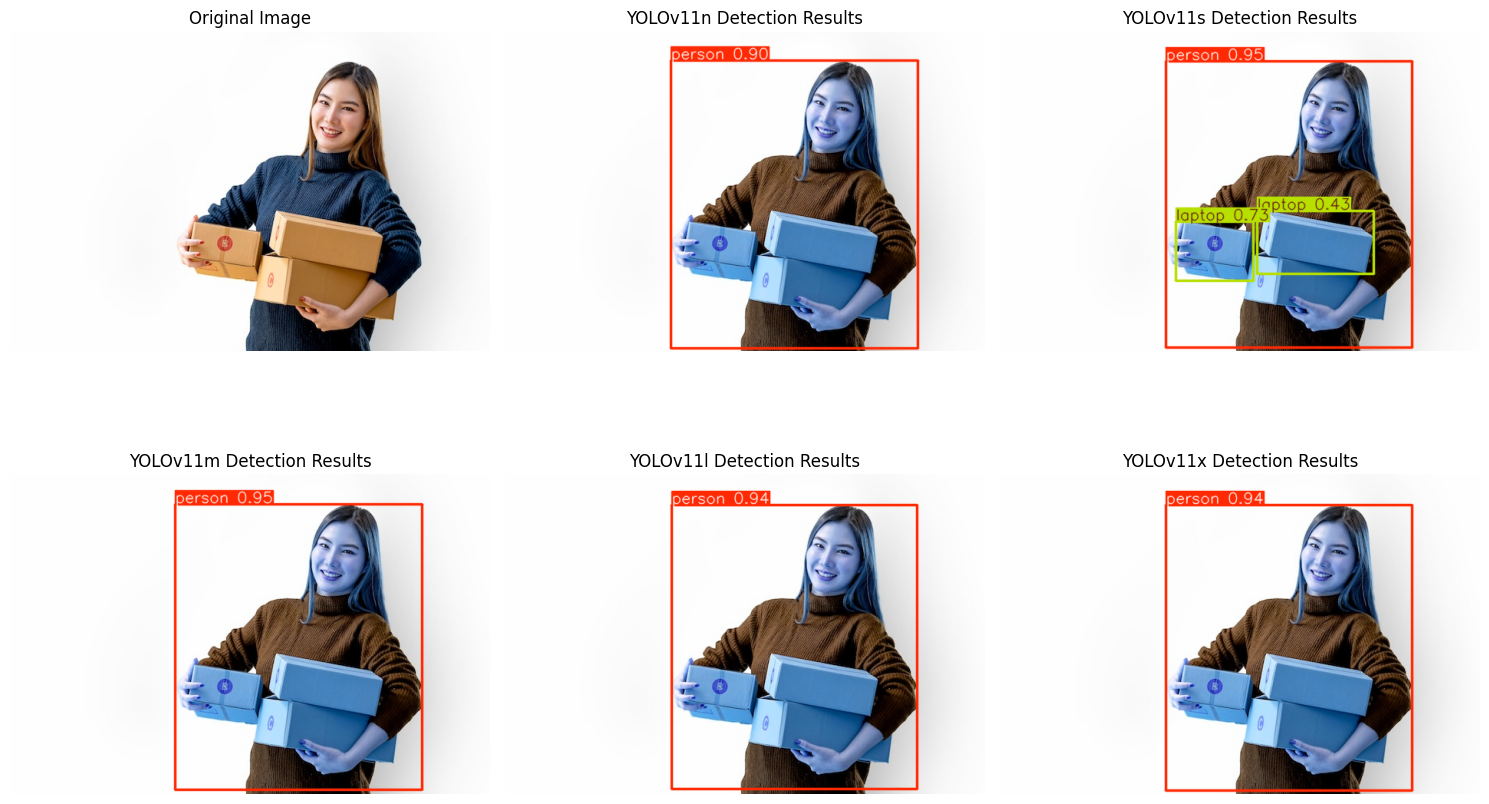

In [ ]:
img_path = '/content/woman.jpg'
original_img = Image.open(img_path)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Display the original image in the first subplot
axes[0, 0].imshow(original_img)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Prepare model names and grid positions (excluding (0, 0))
models = [n_model, s_model, m_model, l_model, x_model]
model_names = ['YOLOv11n', 'YOLOv11s', 'YOLOv11m', 'YOLOv11l', 'YOLOv11x']
positions = [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]  # Skip (0, 0)

# Loop through models and plot their results
for model, name, (row, col) in zip(models, model_names, positions):
    results = model(img_path)
    result_img = results[0].plot()

    axes[row, col].imshow(result_img)
    axes[row, col].set_title(f'{name} Detection Results')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

If you are seeing what I am seeing, the YOLOv11 model seem to be more sensitive to the image, it detects the additional boxes as "laptops"

Now that you see how the YOLOv11 model works, let's train it on a custom dataset provided by the Ultralytics team.

## 5. Visualising a Custom Dataset

First, download the dataset from the Ultralytics GitHub repository:

In [ ]:
# Download the dataset from the Ultralytics GitHub repository
!wget -q https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/datasets/brain-tumor.yaml -O /content/brain-tumor.yaml
# Load a sample image from the dataset to see if it works on the untrained model
validation_img_path = '/content/datasets/brain-tumor/valid/images/val_1 (1).jpg'


image 1/1 /content/datasets/brain-tumor/valid/images/val_1 (1).jpg: 640x640 (no detections), 17.7ms
Speed: 5.0ms preprocess, 17.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/brain-tumor/valid/images/val_1 (1).jpg: 640x640 (no detections), 15.9ms
Speed: 7.3ms preprocess, 15.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/brain-tumor/valid/images/val_1 (1).jpg: 640x640 (no detections), 37.1ms
Speed: 4.2ms preprocess, 37.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/brain-tumor/valid/images/val_1 (1).jpg: 640x640 1 bird, 47.8ms
Speed: 4.0ms preprocess, 47.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/brain-tumor/valid/images/val_1 (1).jpg: 256x256 (no detections), 39.3ms
Speed: 0.9ms preprocess, 39.3ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 256)


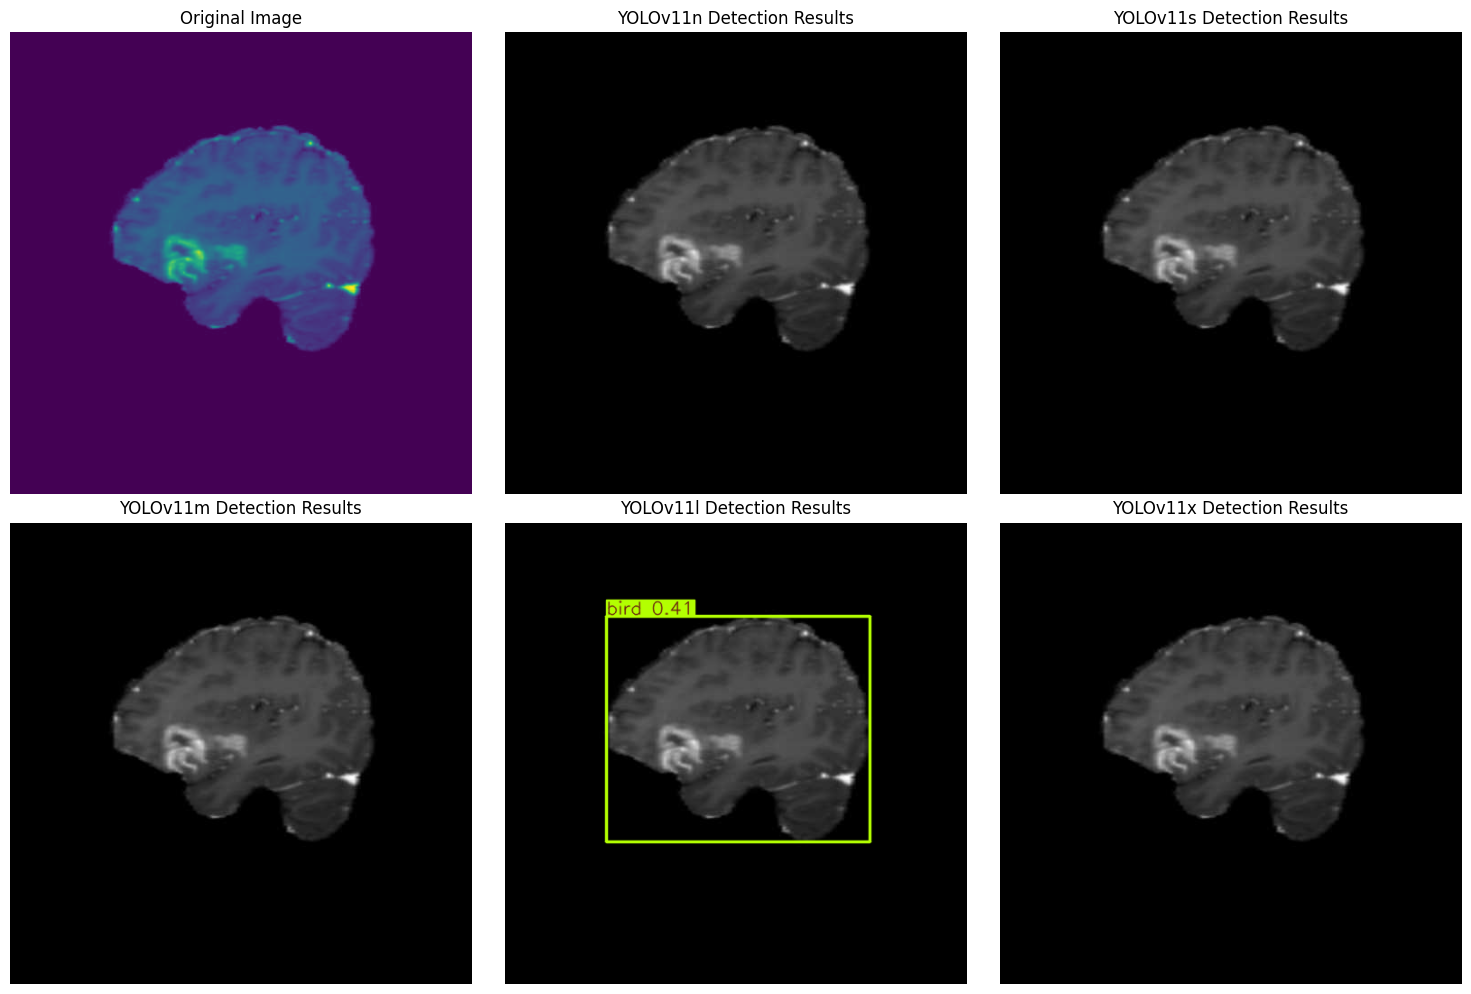

In [ ]:
brain_img = Image.open(validation_img_path)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(brain_img)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Prepare model names and grid positions (excluding (0, 0))
models = [n_model, s_model, m_model, l_model, x_model]
model_names = ['YOLOv11n', 'YOLOv11s', 'YOLOv11m', 'YOLOv11l', 'YOLOv11x']
positions = [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]  # Skip (0, 0)

# Loop through models and plot their results
for model, name, (row, col) in zip(models, model_names, positions):
    results = model(validation_img_path)
    result_img = results[0].plot()

    axes[row, col].imshow(result_img)
    axes[row, col].set_title(f'{name} Detection Results')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

None of the models are able to detect the x-ray image of the brain. The larger models like YOLOv11l and YOLOB11x is detecting a bird and a donut?!?

## 6. Training a Model on a Custom Dataset
We are using the smallest model- n_model to train the model due to the limitations of Google Colab.

**Training Configuration Explained**
Let's understand each parameter:
```python
epochs=20     # Number of complete passes through the dataset (More epoch, better accuracy)
batch=16      # Number of images processed at one training step (Increase if you have enough memory)
imgsz=256     # Input image size (256x256 pixels, smaller trains faster)
```

**Data Augmentation Parameters**
Data augmentation is a technique used to increase the diversity of the training dataset by applying random transformations. This helps the model generalize better. Here are the parameters used:

- `scale=0.8`: Random scaling of images
- `mosaic=0.8`: Combines 4 images into one during training
- `mixup=0.12`: Blends two images to improve generalization and robustness of the model
- `copy_paste=0.3`: Copies and pastes objects from one image to another

**Device and Workers**
- `device="0"`: Use GPU for training (if available)
- `workers=0`: Number of worker threads for data loading (0 means using the main thread)

Feel free to amend the hyperparameters to test it on your device!

In [ ]:
results = n_model.train(
       data='/content/brain-tumor.yaml',
       epochs=20,
       batch=16,
       imgsz=256,
       scale=0.8,
       mosaic=0.8,
       mixup=0.12,
       copy_paste=0.3,
       device="0",
       workers=0
     )

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/content/brain-tumor.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=0, workers=0, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=Non

train: Scanning /content/datasets/brain-tumor/train/labels.cache... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/brain-tumor/valid/labels.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.37G      1.893      2.425      1.387         21        256: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]

                   all        223        241      0.476      0.738      0.472      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         5G      1.375      1.489      1.053         22        256: 100%|██████████| 56/56 [00:16<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241      0.396      0.721      0.454      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.13G      1.354      1.421      1.077         17        256: 100%|██████████| 56/56 [00:16<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]

                   all        223        241      0.433      0.767      0.444      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.26G      1.309      1.341      1.044         34        256: 100%|██████████| 56/56 [00:16<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        223        241      0.413      0.837      0.431      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.39G      1.262      1.244       1.03         25        256: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        223        241      0.448      0.839      0.506      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.71G      1.232      1.269      1.004         22        256: 100%|██████████| 56/56 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]

                   all        223        241      0.433      0.808      0.464      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.72G       1.17       1.16     0.9968         28        256: 100%|██████████| 56/56 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        223        241       0.45      0.833      0.448      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.72G      1.166      1.162     0.9986         13        256: 100%|██████████| 56/56 [00:16<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]

                   all        223        241      0.438      0.863      0.467      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.72G      1.178      1.146      0.999         19        256: 100%|██████████| 56/56 [00:16<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]

                   all        223        241      0.438      0.851      0.474      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.72G      1.137      1.138     0.9761         28        256: 100%|██████████| 56/56 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        223        241      0.423      0.858      0.419      0.281


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.72G     0.9873      1.029     0.9868         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        223        241      0.432      0.845       0.45      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.95G      1.027      1.013      1.002         12        256: 100%|██████████| 56/56 [00:16<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        223        241      0.471      0.859      0.506      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.95G     0.9948      1.023      0.994         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        223        241      0.425      0.853       0.47      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.95G     0.9451     0.9512     0.9757         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        223        241      0.429      0.913      0.451      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.95G     0.9362      0.922       0.94         14        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        223        241      0.434      0.876       0.45      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.95G     0.9233     0.9144     0.9625         14        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        223        241      0.431      0.869      0.457      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.95G     0.8698     0.8403      0.935         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        223        241      0.439      0.892      0.469       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.95G     0.8739     0.8516       0.93         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        223        241      0.432      0.859      0.468       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.95G     0.8639     0.8112      0.937         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        223        241      0.461      0.896      0.483      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.95G     0.8371     0.7935     0.9365         15        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        223        241      0.468      0.912      0.481      0.345



20 epochs completed in 0.121 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 114.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 114.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]


                   all        223        241      0.474      0.856      0.504      0.346
              negative        142        154      0.608      0.838      0.595      0.414
              positive         81         87      0.339      0.874      0.412      0.278
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3


### 6. Evaluating the YOLOv11n Trained Best Model
Using the same validation image above.
What to Look For:
1. **Bounding Box Accuracy**
   - Green box = Ground Truth
   - Predicted box should closely match

2. **Confidence Scores**
   - Higher is better (>0.5 is good)
   - But too high might mean overfitting

3. **False Positives/Negatives**
   - False Positive: Detection where there isn't a tumor
   - False Negative: Missed tumor detection


image 1/1 /content/datasets/brain-tumor/valid/images/val_1 (1).jpg: 256x256 1 negative, 1 positive, 27.0ms
Speed: 0.7ms preprocess, 27.0ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 256)


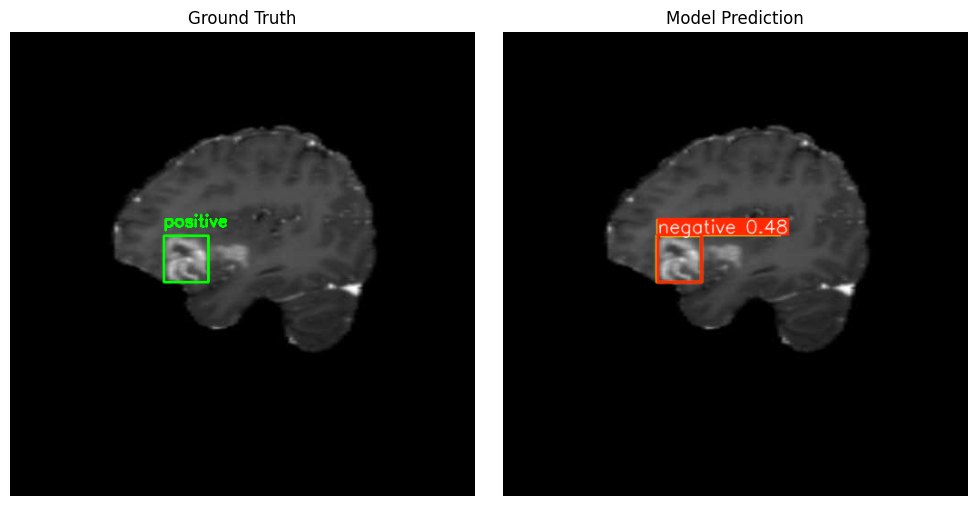


image 1/1 /content/datasets/brain-tumor/valid/images/val_1 (2).jpg: 256x256 1 negative, 28.1ms
Speed: 1.2ms preprocess, 28.1ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)


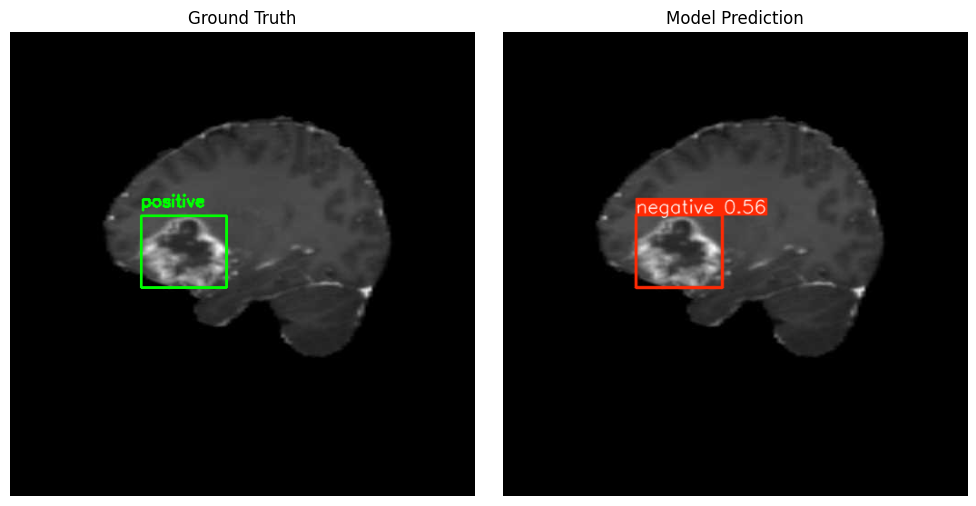


image 1/1 /content/datasets/brain-tumor/valid/images/val_1 (3).jpg: 256x256 1 positive, 27.2ms
Speed: 1.0ms preprocess, 27.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 256)


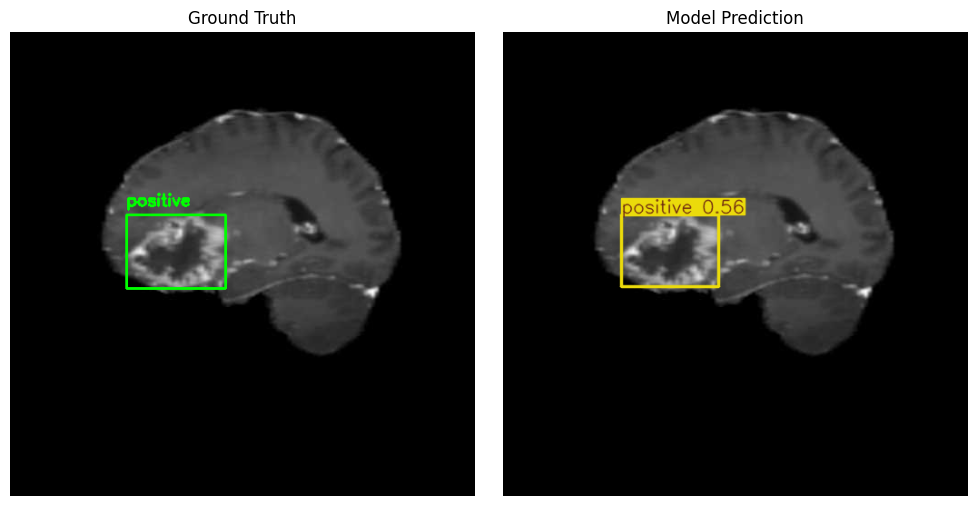

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# === Load trained YOLO model ===
model_path = '/content/runs/detect/train3/weights/best.pt'
model = YOLO(model_path)

# === List of image-label pairs ===
pairs = [
    ("/content/datasets/brain-tumor/valid/images/val_1 (1).jpg",
     "/content/datasets/brain-tumor/valid/labels/val_1 (1).txt"),

    ("/content/datasets/brain-tumor/valid/images/val_1 (2).jpg",
     "/content/datasets/brain-tumor/valid/labels/val_1 (2).txt"),

    ("/content/datasets/brain-tumor/valid/images/val_1 (3).jpg",
     "/content/datasets/brain-tumor/valid/labels/val_1 (3).txt"),
]

# === Loop through each pair ===
for img_path, label_path in pairs:
    # Load image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_h, img_w, _ = image.shape

    # Copy for ground truth box drawing
    ground_truth_img = image.copy()

    # Load label(s) and draw
    with open(label_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            x1 = int((x_center - width / 2) * img_w)
            y1 = int((y_center - height / 2) * img_h)
            x2 = int((x_center + width / 2) * img_w)
            y2 = int((y_center + height / 2) * img_h)

            label_name = "positive" if int(class_id) == 1 else "negative"
            cv2.rectangle(ground_truth_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(ground_truth_img, label_name, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Model prediction
    results = model(img_path)
    prediction_img = results[0].plot()

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(ground_truth_img)
    ax1.set_title('Ground Truth')
    ax1.axis('off')

    ax2.imshow(prediction_img)
    ax2.set_title('Model Prediction')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()
